# Assignment 9 - Computer Applications in Physics

Eigenvalue problem of one dimensional harmonic and anharmonic oscillator in quantum mechanics solved as an initial value problem.

Yu Jiawei (586067)

In [45]:
# Import the necessary packages
import numpy as np
import scipy
import scipy.integrate
from scipy.optimize import fsolve
from scipy.special import factorial
import matplotlib.pyplot as mpl

## Definiton of the Potential and the Solution Range

The potential $V_r(r)$ is defined as:

$$ V(r) = \frac{k}{\alpha!} |r|^{\alpha} \quad \text{with} \quad k,\alpha > 0 $$

For harmonic oscillator $\alpha = 2$

In [46]:
# Define the potential Vr(r)
k = (2*np.pi)**2
m = 1
hbar = 1
alpha = 2

def Vr(r):
    Vr_out = k / factorial(alpha) * abs(r)**alpha
    return Vr_out

In [47]:
# The Range of the problem
N = 1000
R = 3
xr = np.linspace(-R,R,N)

## Solve the Initial Value Problem
The Schrödinger Equation

$$ \frac{d^2\Psi}{dx^2} = \frac{2m}{\hbar^2}\left[V(x)-E\right]\Psi(x) $$

can be written as

$$ \frac{d}{dx} \left[\begin{array}{c} \Psi(x) \\ \Psi'(x) \end{array}\right] = \left[\begin{array}{c} \Psi'(x) \\ \frac{2m}{\hbar^2}\left[V(x)-E\right]\Psi(x) \end{array}\right] $$

with the boundary conditons $\Psi(-R) = \Psi(R) = 0$ in this numerical case as a requirement of normalization.

In [48]:
# Define a state updating function (SUF)
def Next_State(State_vec, x, Vr, E):
    NextState_vec = np.zeros_like(State_vec)
    NextState_vec[0] = State_vec[1]
    NextState_vec[1] = 2*m/hbar**2 * (Vr(x)-E) * State_vec[0]
    return NextState_vec

In an effort to reduce this boundary value problem to an initial value problem which develops over space, shooting method is a practical approach by "shooting" the trajectories of the solution with different parameters until it "hits" the other boundary condition.

We start with the following initial value problem

$$ \frac{d^2\Psi}{dx^2} = \frac{2m}{\hbar^2}\left[V(x)-E\right]\Psi(x) \quad \text{with} \quad \Psi(-R) = 0, \Psi'(-R)=10^{-10} $$

whose solution $\Psi(x)$ depends only on the parameter $E$.

Therefore if we could find the value of the parameter $E$ so that $f(E)=\Psi(R,E)-0=0$, we actually obtain the solution $\Psi(R)$ of the boundary value problem with $E$ know as the eigenvalue of energy.

In [49]:
# The wave function at x=R
def Psi_R(E):
    u0 = [0, 1e-9] # The initial state vector
    sol = scipy.integrate.odeint(Next_State, u0, xr, args=(Vr, E), rtol=1e-10)
    return sol[-1,0]

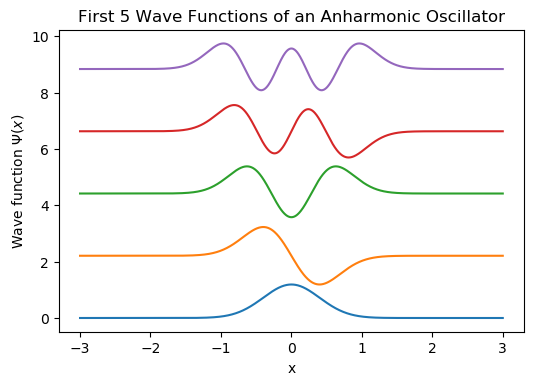

In [50]:
# Solve the equation Psi(R,E)=0 to obtain the parameter E
E0 = [3, 9, 15, 21, 28] # Initial guess of the first five E values
En = np.zeros_like(E0, dtype='float64')
Psi = np.zeros((N,5))

for i in np.arange(E0.__len__()):
    # Solve Eigenvalue E
    En[i] = fsolve(Psi_R, x0=E0[i], xtol=1e-12)
    # Obtain the eigenfunction respecting this E
    u0 = [0, 1e-9]
    sol = scipy.integrate.odeint(Next_State, u0, xr, args=(Vr, En[i]), rtol=1e-10)
    # Normalization of the Eigenfunction
    Psi[:,i] = sol[:,0] / np.sqrt(scipy.integrate.trapz(sol[:,0]**2, xr))

# Plot the results
fig1 = mpl.figure(dpi=100)
offset = Psi.max() - Psi.min()
mpl.plot(xr, Psi + np.arange(5)*offset)
mpl.xlabel('x')
mpl.ylabel('Wave function $\Psi(x)$')
mpl.title('First 5 Wave Functions of an Anharmonic Oscillator')
mpl.show()

## Anharmonic Oscillator
For an anharmonic oscillator with $\alpha = 1$ in the potential

$$ V(r) = \frac{k}{\alpha!} |r|^{\alpha} \quad \text{with} \quad k,\alpha > 0 $$

In [51]:
# Define the potential Vr(r)
k = (2*np.pi)**2
m = 1
hbar = 1
alpha = 1

def Vr(r):
    Vr_out = k / factorial(alpha) * abs(r)**alpha
    return Vr_out

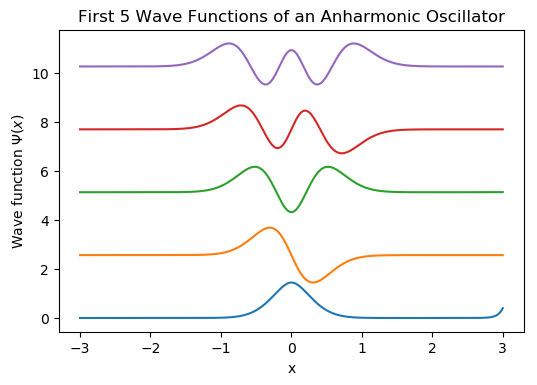

In [52]:
# Solve the equation Psi(R,E)=0 to obtain the parameter E
E0 = [9, 21, 29, 37, 44] # Initial guess of the first five E values
En = np.zeros_like(E0, dtype='float64')
Psi = np.zeros((N,5))

for i in np.arange(E0.__len__()):
    # Solve Eigenvalue E
    En[i] = fsolve(Psi_R, x0=E0[i], xtol=1e-12)
    # Obtain the eigenfunction respecting this E
    u0 = [0, 1e-9]
    sol = scipy.integrate.odeint(Next_State, u0, xr, args=(Vr, En[i]), rtol=1e-10)
    # Normalization of the Eigenfunction
    Psi[:,i] = sol[:,0] / np.sqrt(scipy.integrate.trapz(sol[:,0]**2, xr))
    
# Plot the results
fig2 = mpl.figure(dpi=100)
offset = Psi.max() - Psi.min()
mpl.plot(xr, Psi + np.arange(5)*offset)
mpl.xlabel('x')
mpl.ylabel('Wave function $\Psi(x)$')
mpl.title('First 5 Wave Functions of an Anharmonic Oscillator')
mpl.show()

## Remaining Problems
As is shown in the second graph, the wave function of the ground state does not satisfy the boundary conditon at $x=R$ unter the required circumstances, resulted from the "freely" chosed initial condition $\Psi'(-R)=10^{-9}$ and the relative tolerances `rtol` in the three `odeint()`, which exert an significant influence on the graphs of the wave functions.